In [1]:
#pip install daftlistings

In [2]:
#pip install pandas


In [3]:
#Importing libraries. Libraries explained in report
import pandas as pd
import seaborn as sns; 
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
import numpy as np
warnings.filterwarnings('ignore')

In [4]:
sns.set_theme(style="whitegrid", palette="Dark2") # setting theme and color for whole document
sns.set_context("talk")

In [5]:
from daftlistings import Daft, Location, SearchType, PropertyType, SortType, MapVisualization
#from daftlistings import Daft, SearchType

daft = Daft()
daft.set_search_type(SearchType.NEW_HOMES)

listings = daft.search()

for listing in listings:
    print(listing.title)
    print(listing.price)
    print(listing.daft_link)
    print()
    
with open("NEW.json", "w") as fp:
    fp.writelines("%s\n" % listing.as_dict_for_mapping() for listing in listings)
    
with open("NEW.json") as fp:
  lines = fp.readlines()

print ("\n Results")



Searching...
Search complete. Found 779 listings.
The Meadows - Houses/Duplexes/Apartments, Kill, Co. Kildare
€279,950
http://www.daft.ie/new-home-for-sale/apartment-1-bedroom-apartment-the-meadows-houses-duplexes-apartments-the-meadows-houses-duplexes-apartments-kill-co-kildare/4478495

The Meadows - Houses/Duplexes/Apartments, Kill, Co. Kildare
€344,950
http://www.daft.ie/new-home-for-sale/duplex-2-bedroom-duplex-the-meadows-houses-duplexes-apartments-the-meadows-houses-duplexes-apartments-kill-co-kildare/4478494

The Meadows - Houses/Duplexes/Apartments, Kill, Co. Kildare
€344,950
http://www.daft.ie/new-home-for-sale/apartment-apartments-the-meadows-houses-duplexes-apartments-the-meadows-houses-duplexes-apartments-kill-co-kildare/4699932

The Meadows - Houses/Duplexes/Apartments, Kill, Co. Kildare
€445,000
http://www.daft.ie/new-home-for-sale/end-of-terrace-house-the-lily-the-meadows-houses-duplexes-apartments-the-meadows-houses-duplexes-apartments-kill-co-kildare/4628148

The Meado

In [6]:
op=pd.read_csv("NEW.json") 

In [7]:
op

,{'monthly_price': 279950,'latitude': 53.24007519360717,'longitude': -6.596107252857109,'bedrooms': '1 Bed','bathrooms': '1 Bath','daft_link': 'http://www.daft.ie/new-home-for-sale/apartment-1-bedroom-apartment-the-meadows-houses-duplexes-apartments-the-meadows-houses-duplexes-apartments-kill-co-kildare/4478495'}
0,{'monthly_price': 344950,'latitude': 53.24007519360717,'longitude': -6.596107252857109,'bedrooms': '2 Bed','bathrooms': '2 Bath','daft_link': 'http://www.daft.ie/new-home-for...
1,{'monthly_price': 344950,'latitude': 53.24007519360717,'longitude': -6.596107252857109,'bedrooms': '2 Bed','bathrooms': '2 Bath','daft_link': 'http://www.daft.ie/new-home-for...
2,{'monthly_price': 445000,'latitude': 53.24007519360717,'longitude': -6.596107252857109,'bedrooms': '3 Bed','bathrooms': '3 Bath','daft_link': 'http://www.daft.ie/new-home-for...
3,{'monthly_price': 465000,'latitude': 53.24007519360717,'longitude': -6.596107252857109,'bedrooms': '3 Bed','bathrooms': '3 Bath','daft_link': 'http://www.daft.ie/new-home-for...
4,{'monthly_price': 470000,'latitude': 53.24007519360717,'longitude': -6.596107252857109,'bedrooms': '3 Bed','bathrooms': '3 Bath','daft_link': 'http://www.daft.ie/new-home-for...
...,...,...,...,...,...,...
773,{'monthly_price': 450000,'latitude': 53.13912233286129,'longitude': -7.5136842308870655,'bedrooms': '4 bed','bathrooms': '1+ bath','daft_link': 'http://www.daft.ie/new-home-for...
774,{'monthly_price': 595000,'latitude': 53.24422606613311,'longitude': -6.185629300973972,'bedrooms': '3 & 4 bed','bathrooms': '1+ bath','daft_link': 'http://www.daft.ie/new-home-for...
775,{'monthly_price': 345000,'latitude': 53.23214310280079,'longitude': -7.322323580280909,'bedrooms': '4 bed','bathrooms': '1+ bath','daft_link': 'http://www.daft.ie/new-home-for...
776,{'monthly_price': 'Price on Application','latitude': 53.971777649513825,'longitude': -8.291215044911269,'bedrooms': '1+ bed','bathrooms': '1+ bath','daft_link': 'http://www.daft.ie/new-home-for...


Change columns name

In [8]:
op.columns = ['price', 'latitude', 'longitude', 'bedrooms', 'bathrooms','link'] # changing names 

Missing values

In [9]:
percent_missing = op.isnull().sum() * 100 / len(op)
missing_value_data = pd.DataFrame({'percent_missing': percent_missing})

missing_value_data

,percent_missing
price,0.0
latitude,0.0
longitude,0.0
bedrooms,0.0
bathrooms,0.0
link,0.0


cleaning columns

In [10]:
# op['price'] = op['price'].str.replace(r'\D+', '') # removing all non numeric values
# op['bedrooms'] = op['bedrooms'].str.replace(r'\D+', '')
# op['bathrooms'] = op['bathrooms'].str.replace(r'\D+', '')
# op['latitude'] = op['latitude'].str.replace("'", "")
# op['latitude'] = op['latitude'].str.replace("latitude: ", "")
# op['longitude'] = op['longitude'].str.replace("'", "")
# op['longitude'] = op['longitude'].str.replace("longitude: ", "")
# #op['longitude'] = op['longitude'].str.replace(r'\D+', '')

In [11]:
def clean_data(op):
    op['price'] = op['price'].str.replace(r'\D+', '') # removing all non numeric values
    op['bedrooms'] = op['bedrooms'].str.replace(r'\D+', '')
    op['bathrooms'] = op['bathrooms'].str.replace(r'\D+', '')
    op['latitude'] = op['latitude'].str.replace("'", "")
    op['latitude'] = op['latitude'].str.replace("latitude: ", "")
    op['longitude'] = op['longitude'].str.replace("'", "")
    op['longitude'] = op['longitude'].str.replace("longitude: ", "")
  
    return op

In [12]:
op = clean_data(op)

In [13]:
op.head()

,price,latitude,longitude,bedrooms,bathrooms,link
0,344950,53.24007519360717,-6.596107252857109,2,2,'daft_link': 'http://www.daft.ie/new-home-for...
1,344950,53.24007519360717,-6.596107252857109,2,2,'daft_link': 'http://www.daft.ie/new-home-for...
2,445000,53.24007519360717,-6.596107252857109,3,3,'daft_link': 'http://www.daft.ie/new-home-for...
3,465000,53.24007519360717,-6.596107252857109,3,3,'daft_link': 'http://www.daft.ie/new-home-for...
4,470000,53.24007519360717,-6.596107252857109,3,3,'daft_link': 'http://www.daft.ie/new-home-for...


In [14]:
op = op.drop_duplicates()

In [15]:
op[['latitude', 'longitude']] = op[['latitude', 'longitude']].astype(float)

In [16]:
op.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 778 entries, 0 to 777
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price      778 non-null    object 
 1   latitude   778 non-null    float64
 2   longitude  778 non-null    float64
 3   bedrooms   778 non-null    object 
 4   bathrooms  778 non-null    object 
 5   link       778 non-null    object 
dtypes: float64(2), object(4)
memory usage: 42.5+ KB


In [17]:
op[['bedrooms', 'bathrooms']] = op[['bedrooms', 'bathrooms']].astype(int)

In [18]:
op.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 778 entries, 0 to 777
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price      778 non-null    object 
 1   latitude   778 non-null    float64
 2   longitude  778 non-null    float64
 3   bedrooms   778 non-null    int32  
 4   bathrooms  778 non-null    int32  
 5   link       778 non-null    object 
dtypes: float64(2), int32(2), object(2)
memory usage: 36.5+ KB


In [19]:
op.describe()

,latitude,longitude,bedrooms,bathrooms
count,778.000000,778.000000,778.000000,778.000000
mean,53.001074,-7.236243,3.349614,2.739075
std,0.584703,1.043257,1.404582,0.790901
min,51.712460,-10.235627,1.000000,1.000000
25%,52.662087,-8.229881,3.000000,2.000000
50%,53.189388,-6.813283,3.000000,3.000000
75%,53.330244,-6.347258,4.000000,3.000000
max,54.656769,-6.058019,34.000000,6.000000


In [20]:
op.describe(include='all')

,price,latitude,longitude,bedrooms,bathrooms,link
count,778,778.000000,778.000000,778.000000,778.000000,778
unique,159,NaN,NaN,NaN,NaN,778
top,,NaN,NaN,NaN,NaN,'daft_link': 'http://www.daft.ie/new-home-for...
freq,249,NaN,NaN,NaN,NaN,1
mean,NaN,53.001074,-7.236243,3.349614,2.739075,NaN
std,NaN,0.584703,1.043257,1.404582,0.790901,NaN
min,NaN,51.712460,-10.235627,1.000000,1.000000,NaN
25%,NaN,52.662087,-8.229881,3.000000,2.000000,NaN
50%,NaN,53.189388,-6.813283,3.000000,3.000000,NaN
75%,NaN,53.330244,-6.347258,4.000000,3.000000,NaN


In [21]:
op['bedrooms'].unique()

array([ 2,  3,  4,  5,  1, 34])

In [22]:
op['price'].unique()

array(['344950', '445000', '465000', '470000', '515000', '540000', '',
       '530000', '715000', '875000', '895000', '695000', '725000',
       '735000', '845000', '400000', '420000', '520000', '650000',
       '430000', '570000', '1750000', '315000', '825000', '350000',
       '565000', '665000', '425000', '495000', '525000', '595000',
       '380000', '620000', '750000', '250000', '285000', '340000',
       '360000', '385000', '415000', '290000', '295000', '325000',
       '395000', '405000', '1250000', '1595000', '1795000', '535000',
       '575000', '775000', '1400000', '429500', '355000', '365000',
       '375000', '410000', '450000', '455000', '685000', '475000',
       '795000', '390000', '545000', '1100000', '500000', '870000',
       '330000', '329950', '547000', '640000', '755000', '345000',
       '435000', '560000', '675000', '780000', '280000', '310000',
       '460000', '499000', '550000', '660000', '600000', '245000',
       '499500', '300000', '900000', '1050000', '320

In [23]:
counts = op['bedrooms'].value_counts()
print(counts)

3     329
4     295
2      80
5      43
1      30
34      1
Name: bedrooms, dtype: int64


In [24]:
(op['price'].values == '').sum()  
#print(op)

249

In [25]:
(op['price'].values != '')

array([ True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True,  True,  True, False, False, False, False,
        True,  True,  True,  True,  True, False, False, False, False,
       False,  True,  True,  True,  True,  True, False, False, False,
        True,  True, False,  True,  True, False,  True, False, False,
       False, False, False, False, False,  True,  True,  True, False,
       False, False,  True, False, False, False,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
        True,  True, False, False, False, False,  True,  True,  True,
       False, False,  True, False, False, False,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False,

In [26]:
op=op.loc[(op['price'] != '')]

In [27]:
op

,price,latitude,longitude,bedrooms,bathrooms,link
0,344950,53.240075,-6.596107,2,2,'daft_link': 'http://www.daft.ie/new-home-for...
1,344950,53.240075,-6.596107,2,2,'daft_link': 'http://www.daft.ie/new-home-for...
2,445000,53.240075,-6.596107,3,3,'daft_link': 'http://www.daft.ie/new-home-for...
3,465000,53.240075,-6.596107,3,3,'daft_link': 'http://www.daft.ie/new-home-for...
4,470000,53.240075,-6.596107,3,3,'daft_link': 'http://www.daft.ie/new-home-for...
...,...,...,...,...,...,...
771,525000,53.340545,-6.555606,4,3,'daft_link': 'http://www.daft.ie/new-home-for...
772,535000,53.340545,-6.555606,3,3,'daft_link': 'http://www.daft.ie/new-home-for...
773,450000,53.139122,-7.513684,4,1,'daft_link': 'http://www.daft.ie/new-home-for...
774,595000,53.244226,-6.185629,34,1,'daft_link': 'http://www.daft.ie/new-home-for...


In [28]:
counts = op['price'].value_counts()
print(counts)

400000     13
325000     13
495000     12
395000     11
375000     10
           ..
1800000     1
312000      1
1050000     1
1400000     1
260000      1
Name: price, Length: 158, dtype: int64


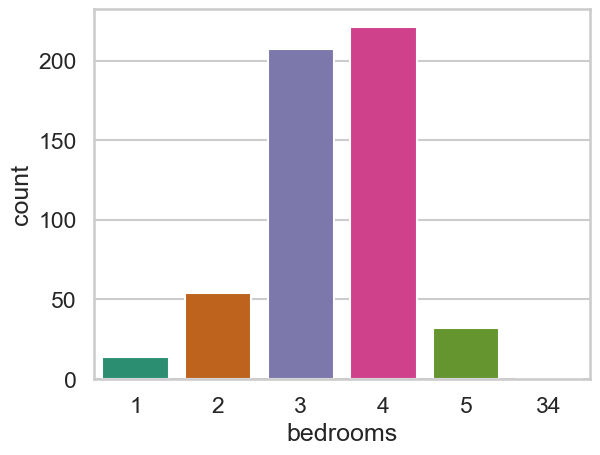

In [29]:
sns.countplot(x='bedrooms', data=op);

# Show the plot
#sns.show()

In [30]:
op.drop(op.index[op['bedrooms'] == 34], inplace = True)

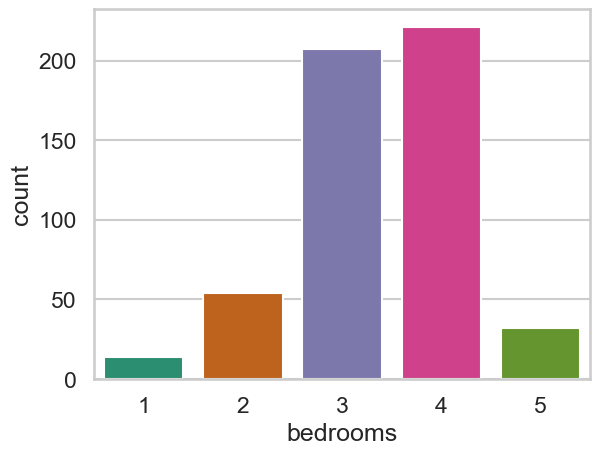

In [31]:
sns.countplot(x='bedrooms', data=op);

# Show the plot
#sns.show()

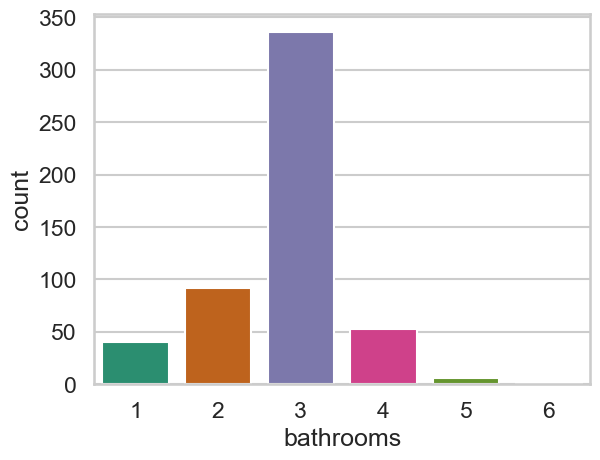

In [32]:
sns.countplot(x='bathrooms', data=op);

In [33]:
op.count()

price        528
latitude     528
longitude    528
bedrooms     528
bathrooms    528
link         528
dtype: int64

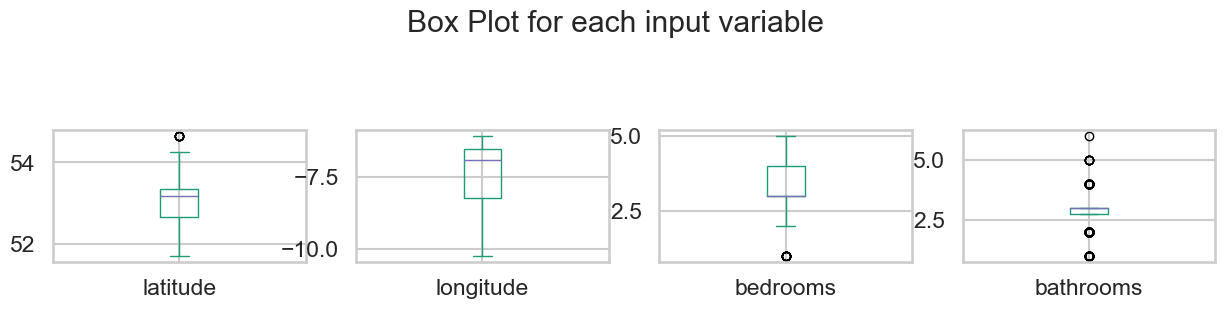

In [34]:
op.plot(kind='box', subplots=True, layout=(6,4), sharex=False, sharey=False, figsize=(15,12), title='Box Plot for each input variable')
plt.show()

<Axes: xlabel='bedrooms'>

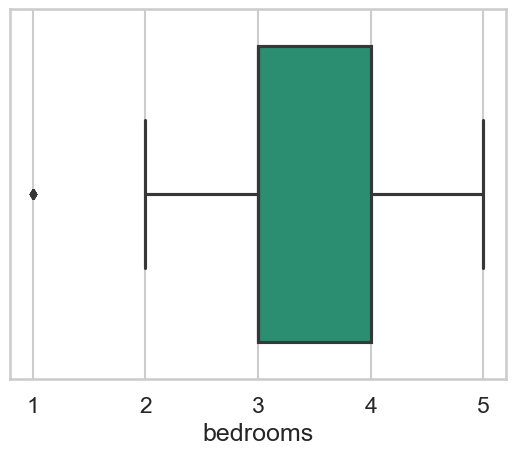

In [35]:
sns.boxplot(x=op["bedrooms"])

<Axes: xlabel='bathrooms'>

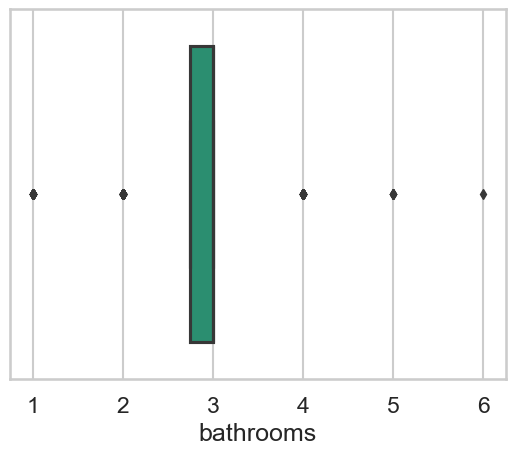

In [36]:
sns.boxplot(x=op["bathrooms"])

,latitude,longitude,bedrooms,bathrooms
latitude,1.000000,0.326267,-0.091707,-0.091316
longitude,0.326267,1.000000,-0.114515,-0.141708
bedrooms,-0.091707,-0.114515,1.000000,0.606643
bathrooms,-0.091316,-0.141708,0.606643,1.000000


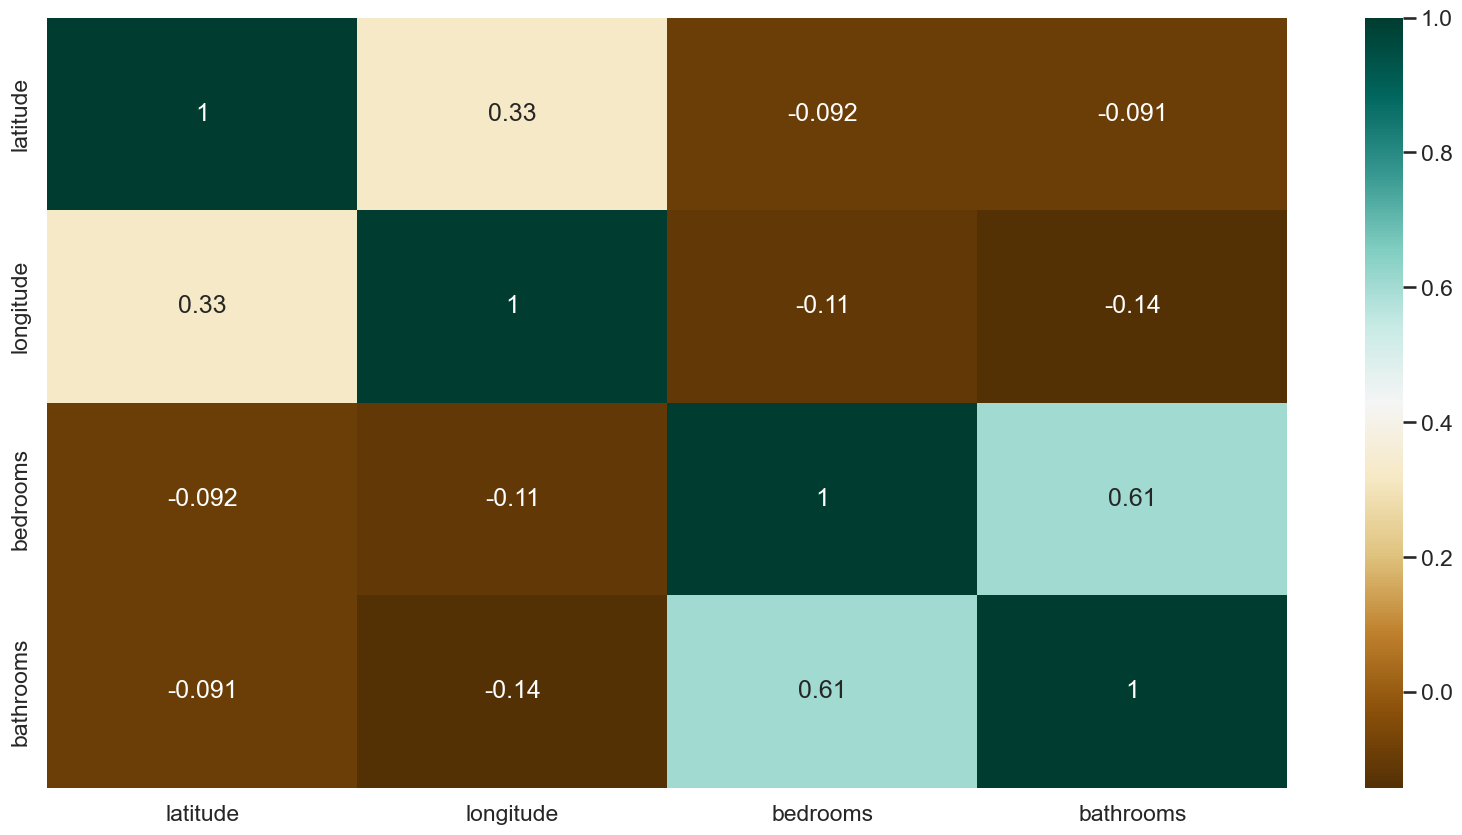

In [37]:
plt.figure(figsize=(20,10))
c= op.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

Text(0, 0.5, 'bedrooms')

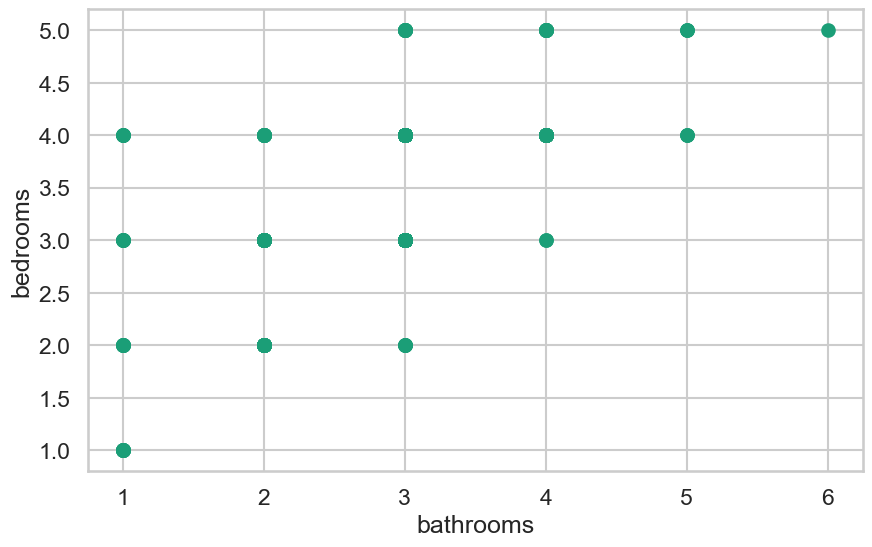

In [38]:

    fig, ax = plt.subplots(figsize=(10,6))
    ax.scatter(op["bathrooms"], op["bedrooms"])
    ax.set_xlabel("bathrooms")
    ax.set_ylabel("bedrooms")


In [42]:
t=op.iloc[:5]

In [43]:
t

,price,latitude,longitude,bedrooms,bathrooms,link
0,344950,53.240075,-6.596107,2,2,'daft_link': 'http://www.daft.ie/new-home-for...
1,344950,53.240075,-6.596107,2,2,'daft_link': 'http://www.daft.ie/new-home-for...
2,445000,53.240075,-6.596107,3,3,'daft_link': 'http://www.daft.ie/new-home-for...
3,465000,53.240075,-6.596107,3,3,'daft_link': 'http://www.daft.ie/new-home-for...
4,470000,53.240075,-6.596107,3,3,'daft_link': 'http://www.daft.ie/new-home-for...
